Voici une analyse détaillée de l'intérêt de chaque feature pour prédire la survie dans un cancer du sang :

## **ID (Identifiant patient)**
- **Intérêt direct** : Aucun pour la prédiction (simple identifiant)
- **Utilité** : Essentiel pour l'agrégation des données et le suivi longitudinal
- **Traitement** : À utiliser comme clé de regroupement, pas comme feature prédictive

## **CHR, START, END (Position génomique)** (pas plus important)
- **Intérêt modéré** : Indirect
- **Pourquoi** : Certaines régions chromosomiques sont plus critiques (ex: régions de gènes suppresseurs de tumeurs, oncogènes)
- **Exploitation** : 
  - Peut révéler des "hotspots" mutationnels associés à un mauvais pronostic
  - Utile pour identifier des clusters de mutations
  - Mieux utilisé via des features dérivées (ex: région régulatrice, densité de mutations)

## **REF et ALT (Nucléotides)** ( pas le plus important )
- **Intérêt faible** : Seuls, peu informatifs
- **Pourquoi** : Le type de substitution (transition vs transversion) peut indiquer certains processus mutationnels
- **Exploitation** :
  - Créer des features dérivées : type de mutation (C>T, A>G, etc.)
  - Signature mutationnelle (certains profils sont pronostiques)

## **GENE (Gène affecté)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Critical pour le pronostic
- **Pourquoi** : 
  - Certains gènes sont des **marqueurs pronostiques établis** (ex: TP53, FLT3, NPM1, DNMT3A dans les leucémies)
  - La présence/absence de mutations dans des gènes clés est souvent incluse dans les classifications de risque clinique
- **Exploitation** :
  - One-hot encoding ou embedding des gènes fréquents **(fait encoding spécial)**
  - Créer des features : nombre de gènes mutés **fait** , présence de gènes à haut risque **inclus dans l'encoding**
  - Grouper par voies biologiques **(fait)**

## **PROTEIN_CHANGE (Changement protéique)** ⭐ **IMPORTANT**
- **Intérêt élevé** : Très informatif
- **Pourquoi** :
  - Certaines mutations spécifiques sont des "drivers" connus (ex: FLT3-ITD, JAK2 V617F)
  - La position de la mutation dans la protéine affecte sa sévérité (domaine fonctionnel vs non-fonctionnel)
- **Exploitation** :
  - Identifier les mutations récurrentes ("hotspot mutations")
  - Distinguer les mutations dans des domaines critiques
  - Utiliser des bases de données comme COSMIC pour annoter les mutations connues

## **EFFECT (Catégorie d'effet)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Excellent prédicteur
- **Pourquoi** :
  - Les mutations avec perte de fonction (frameshift, nonsense) ont souvent un impact plus sévère que les missense
  - Permet de stratifier rapidement l'impact fonctionnel
- **Catégories typiques** : 
  - **Haut impact** : frameshift, stop gained/lost, splice site
  - **Moyen** : missense, inframe indels
  - **Faible** : synonymous, UTR
- **Exploitation** :
  - Feature catégorielle directe
  - Créer des scores agrégés : proportion de mutations à haut impact par patient

## **VAF (Variant Allele Fraction)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : Potentiellement le plus prédictif
- **Pourquoi** :
  - **Charge tumorale** : VAF élevé = proportion importante de cellules mutées = tumeur plus agressive ou plus avancée
  - **Clonalité** : VAF élevé suggère une mutation "fondatrice" (précoce, présente dans toutes les cellules tumorales)
  - **Hétérogénéité** : Distribution des VAF indique la complexité clonale (mauvais pronostic si élevée)
- **Exploitation** :
  - VAF moyen/médian par patient
  - VAF max (mutation dominante)
  - Nombre de mutations avec VAF > seuil (ex: 0.3, 0.5)
  - Distribution/variance des VAF (hétérogénéité)
  - VAF pondéré par l'importance du gène

---

## **Features dérivées recommandées**

Pour maximiser la performance de votre modèle ML, créez ces features agrégées **par patient** :

1. **Charge mutationnelle**
   - Nombre total de mutations somatiques
   - Nombre de mutations à haut impact

2. **Profil génétique**
   - Présence/absence de gènes pronostiques connus
   - Score de risque génétique composite

3. **Métriques de VAF**
   - VAF moyen, médian, max
   - Écart-type des VAF (hétérogénéité)
   - Nombre de mutations avec VAF > 0.4 (mutations clonales)

4. **Complexité tumorale**
   - Nombre de voies biologiques affectées
   - Diversité des effets (entropie des catégories EFFECT)

5. **Interactions génétiques**
   - Co-occurrence de mutations (certaines combinaisons sont synergiques)

Ces données génomiques sont extrêmement riches pour la prédiction de survie dans les cancers hématologiques !

Voici une analyse détaillée de l'intérêt de chaque feature clinique pour prédire la survie :

## **ID (Identifiant patient)**
- **Intérêt** : Aucun (clé de jointure avec les données moléculaires)

## **CENTER (Centre clinique)** 
- **Intérêt modéré** : Potentiellement informatif
- **Pourquoi** :
  - **Qualité des soins** : Variations entre centres (expertise, protocoles)
  - **Biais de sélection** : Certains centres peuvent recruter des cas plus complexes
  - **Facteurs socio-économiques** : Accès aux traitements, suivi
- **Exploitation** :
  - Encoding catégoriel ou groupement par taille/expertise
  - Peut servir de variable de stratification
- **Attention** : Risque de sur-apprentissage si peu de patients par centre

## **BM_BLAST (Blastes médullaires en %)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : Un des marqueurs pronostiques les plus puissants
- **Pourquoi** :
  - **Critère diagnostique** : Définit le type et le stade de la maladie (ex: MDS vs AML si >20%)
  - **Charge tumorale** : % élevé = maladie plus agressive
  - **Classification WHO** : Seuils pronostiques établis (5%, 10%, 20%)
  - Corrélé directement à la survie : plus le % est élevé, pire le pronostic
- **Exploitation** :
  - Feature continue très prédictive
  - Créer des catégories selon classifications cliniques
  - Interaction avec cytogénétique (blast + mauvaise cyto = très mauvais pronostic)

## **WBC (Globules blancs en G/L)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Marqueur pronostique établi
- **Pourquoi** :
  - **WBC élevé** (>20-30 G/L) = souvent mauvais pronostic dans les leucémies
  - Reflète la **prolifération tumorale**
  - **Leucocytose** peut indiquer une maladie agressive (ex: leucémie myélomonocytaire chronique)
  - Risque de complications (leucostase, syndrome de lyse tumorale)
- **Exploitation** :
  - Feature continue
  - Transformation log possible (distribution souvent asymétrique)
  - Seuils cliniques : <4, 4-10, 10-30, >30 G/L

## **ANC (Neutrophiles absolus en G/L)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Indicateur de fonction médullaire
- **Pourquoi** :
  - **Neutropénie** (<1.5 G/L) = risque infectieux, réserve médullaire faible
  - Reflète la capacité de la moelle à produire des cellules normales
  - ANC bas = moelle "envahie" par les cellules tumorales
  - **Pronostic** : ANC bas corrélé à survie réduite
- **Exploitation** :
  - Feature continue
  - Catégories cliniques : sévère (<0.5), modérée (0.5-1.0), normale (>1.5)

## **MONOCYTES (Monocytes en G/L)** ⭐ **IMPORTANT** (absent dans le test donc drop)
- **Intérêt élevé** : Spécifique selon le type de cancer
- **Pourquoi** :
  - **Monocytose** (>1 G/L) : critère diagnostique de certains cancers (LMMC = leucémie myélomonocytaire chronique)
  - Marqueur de sous-type de maladie
  - Peut indiquer une différenciation monocytaire anormale
- **Exploitation** :
  - Feature continue
  - Ratio monocytes/lymphocytes (si lymphocytes disponibles)
  - Seuil à 1 G/L pour monocytose

## **HB (Hémoglobine en g/dL)** ⭐ **TRÈS IMPORTANT**
- **Intérêt majeur** : Marqueur de sévérité
- **Pourquoi** :
  - **Anémie** = symptôme clé des cancers du sang (insuffisance médullaire)
  - HB bas (<10 g/dL) = mauvais pronostic établi
  - Reflète la capacité de production érythrocytaire
  - Impact sur qualité de vie et performance status
  - Critère majeur dans les scores pronostiques (IPSS, IPSS-R)
- **Exploitation** :
  - Feature continue très prédictive
  - Catégories WHO : sévère (<8), modérée (8-10), légère (10-12)
  - Dépendance aux transfusions (si HB très bas)

## **PLT (Plaquettes en G/L)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : Un des plus puissants prédicteurs
- **Pourquoi** :
  - **Thrombopénie** (<100 G/L) = marqueur pronostique majeur
  - PLT bas = insuffisance médullaire sévère, risque hémorragique
  - **Sévérité** : PLT <50 = mauvais, PLT <20 = très mauvais pronostic
  - Critère central dans tous les scores pronostiques (IPSS, WPSS, IPSS-R)
  - Reflète la fonction mégacaryocytaire
- **Exploitation** :
  - Feature continue extrêmement prédictive
  - Catégories : sévère (<50), modérée (50-100), normale (>150)
  - Transformation log possible

## **CYTOGENETICS (Caryotype)** ⭐ **EXTRÊMEMENT IMPORTANT**
- **Intérêt critique** : LE facteur pronostique le plus puissant dans beaucoup de cancers du sang
- **Pourquoi** :
  - **Classification de risque** : Base des scores pronostiques (IPSS-R)
  - Certaines anomalies sont **très défavorables** : -7/del(7q), -5/del(5q), caryotype complexe (≥3 anomalies), anomalies chromosome 3
  - Certaines sont **favorables** : del(5q) isolée, del(20q), -Y
  - **Caryotype complexe** (≥3 anomalies) = très mauvais pronostic
  - **Caryotype normal** vs **anormal** = différence pronostique majeure
- **Exploitation** :
  - **Parsing ISCN** : Complexe mais essentiel !
    - Identifier : nombre de chromosomes (46 = normal, autres = aneuploidie)
    - Détecter délétions (del, -), additions (+), translocations t()
    - Compter nombre d'anomalies (complexité)
  - **Features à créer** :
    - **Catégorie de risque cytogénétique** : Très bon / Bon / Intermédiaire / Mauvais / Très mauvais (selon classification IPSS-R)
    - Présence d'anomalies spécifiques : -7, del(5q), -5, anomalie 3, etc.
    - **Complexité** : nombre d'anomalies (0, 1, 2, 3+)
    - Caryotype normal (46,XX ou 46,XY) vs anormal
    - Monosomies/trisomies
- **Exemples de classification** :
  - **Très favorable** : -Y isolé, del(11q) isolé
  - **Favorable** : Normal, del(5q) isolé, del(12p) isolé, del(20q) isolé, double incluant del(5q)
  - **Intermédiaire** : del(7q) isolé, +8 isolé, +19 isolé, i(17q) isolé, autres simples/doubles
  - **Défavorable** : -7, inv(3)/t(3q), double incluant -7/del(7q), caryotype complexe (3 anomalies)
  - **Très défavorable** : Caryotype complexe (>3 anomalies)

---

## **Features dérivées recommandées**

### 1. **Scores pronostiques établis** (à recréer)
- **IPSS-R** (International Prognostic Scoring System - Revised) :
  - Combine : BM_BLAST, cytogénétique, HB, PLT, ANC
  - Classification : Très bas / Bas / Intermédiaire / Élevé / Très élevé risque
- **WPSS** (WHO Prognostic Scoring System)

### 2. **Ratios et interactions**
- WBC/ANC (proportion de cellules anormales)
- PLT/HB (sévérité de l'atteinte médullaire)
- BM_BLAST × complexité cytogénétique
- Charge tumorale composite : (BM_BLAST + WBC_log) × risque_cyto

### 3. **Sévérité globale**
- Nombre de cytopénies (HB bas + PLT bas + ANC bas)
- Score composite d'insuffisance médullaire

### 4. **Catégorisation cytogénétique**
- **Essentiel** : Parser le caryotype pour extraire :
  - Risque cytogénétique (selon IPSS-R)
  - Nombre d'anomalies
  - Présence d'anomalies à haut risque (-7, -5, complexe)

---

## **Priorités pour le ML**

**Top 3 features les plus prédictives** :
1. **CYTOGENETICS** (une fois parsé et catégorisé)
2. **BM_BLAST**
3. **PLT**

Ces trois features constituent la base des scores pronostiques cliniques validés et sont probablement les plus importants pour votre modèle.

**Attention** : La cytogénétique nécessite un travail de preprocessing substantiel (parsing ISCN, classification de risque) mais c'est un investissement crucial pour la performance du modèle !

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

from sksurv.util import Surv

In [2]:
from ens_data_challenge.gloabls import TRAIN_CLINICAL_DATA_PATH, TRAIN_MOLECULAR_DATA_PATH, TRAIN_TARGET_PATH, TEST_CLINICAL_DATA_PATH, TEST_MOLECULAR_DATA_PATH
df = pd.read_csv(TRAIN_CLINICAL_DATA_PATH)
df_eval = pd.read_csv(TEST_CLINICAL_DATA_PATH)

# Molecular Data
maf_df = pd.read_csv(TRAIN_MOLECULAR_DATA_PATH)
maf_eval = pd.read_csv(TEST_MOLECULAR_DATA_PATH)

target_df = pd.read_csv(TRAIN_TARGET_PATH)

# Preview the data
df.head()

,ID,CENTER,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT,CYTOGENETICS
0,P132697,MSK,14.0,2.8,0.2,0.7,7.6,119.0,"46,xy,del(20)(q12)[2]/46,xy[18]"
1,P132698,MSK,1.0,7.4,2.4,0.1,11.6,42.0,"46,xx"
2,P116889,MSK,15.0,3.7,2.1,0.1,14.2,81.0,"46,xy,t(3;3)(q25;q27)[8]/46,xy[12]"
3,P132699,MSK,1.0,3.9,1.9,0.1,8.9,77.0,"46,xy,del(3)(q26q27)[15]/46,xy[5]"
4,P132700,MSK,6.0,128.0,9.7,0.9,11.1,195.0,"46,xx,t(3;9)(p13;q22)[10]/46,xx[10]"


In [3]:
from ens_data_challenge.preprocess.preprocessor import Preprocessor

preprocessor = Preprocessor(
    clinical_data_train = df,
    clinical_data_test= df_eval,
    molecular_data_train = maf_df,
    molecular_data_test= maf_eval,
)

preprocessor.clean_data()

C:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\src\ens_data_challenge\preprocess\preprocessor.py:307: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.clinical_data_train.fillna({col: mode_val}, inplace=True)
C:\Users\enzo.cAo\Documents\Projects\competitions\ens_data_challenge\src\ens_data_challenge\preprocess\preprocessor.py:308: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.clinical_data_test.fillna({col: mode_val}, inplace=True)


In [4]:
df_cleaned, df_eval_cleaned = preprocessor.get_clinical_data()
maf_cleaned, maf_eval_cleaned = preprocessor.get_molecular_data()

In [5]:
df_cleaned

,ID,BM_BLAST,WBC,ANC,HB,PLT,is_normal,ploidy,has_tp53_deletion,has_complex_chr3,...,n_deletions,n_critical_regions_deleted,is_mosaic,n_clones,abnormal_clone_percentage,computed_risk_score,mds_ipss_cyto_risk,aml_eln_2022_cyto_risk,cll_cyto_risk,mm_riss_cyto_risk
0,P132697,14.0,2.80,0.20,7.6,119.0,False,46.0,False,False,...,1.0,0.0,True,2.0,10.0,0.185,Good,Intermediate,Intermediate,Standard
1,P132698,1.0,7.40,2.40,11.6,42.0,True,46.0,False,False,...,0.0,0.0,False,1.0,0.0,0.000,Good,Intermediate,Very Low,Standard
2,P116889,15.0,3.70,2.10,14.2,81.0,False,46.0,False,True,...,0.0,0.0,True,2.0,40.0,0.336,Intermediate,Adverse,Intermediate,Standard
3,P132699,1.0,3.90,1.90,8.9,77.0,False,46.0,False,False,...,1.0,0.0,True,2.0,75.0,0.185,Intermediate,Intermediate,Intermediate,Standard
4,P132700,6.0,128.00,9.70,11.1,195.0,False,46.0,False,False,...,0.0,0.0,True,2.0,50.0,0.185,Intermediate,Adverse,Intermediate,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,P121828,1.0,3.70,2.53,8.9,499.0,True,46.0,False,False,...,0.0,0.0,False,1.0,0.0,0.000,Good,Intermediate,Very Low,Standard
3319,P121829,0.0,4.20,2.40,10.6,49.0,False,46.0,False,False,...,1.0,0.0,True,3.0,5.0,0.185,Intermediate,Intermediate,Low,Standard
3320,P121830,0.0,1.80,0.55,9.4,86.0,False,45.0,False,False,...,0.0,0.0,True,2.0,80.0,0.382,Poor,Adverse,Intermediate,Standard
3321,P121853,5.0,1.37,0.37,11.4,102.0,False,46.0,False,False,...,1.0,0.0,True,4.0,25.0,0.185,Intermediate,Intermediate,Intermediate,Standard


In [6]:
print(maf_cleaned.columns)

Index(['ID', 'CHR', 'START', 'END', 'REF', 'ALT', 'GENE', 'PROTEIN_CHANGE',
       'EFFECT', 'VAF', 'DEPTH'],
      dtype='object')


In [7]:
maf_grouped = maf_eval_cleaned.groupby('ID')

In [8]:
from ens_data_challenge.feature_engineering.feature_engineering import FeatureEngineering
from ens_data_challenge.types import CytoColumns, MolecularColumns

fe = FeatureEngineering(
    clinical_data_train=df_cleaned,
    clinical_data_test=df_eval_cleaned,
    molecular_data_train=maf_cleaned,
    molecular_data_test=maf_eval_cleaned,
    target_data=target_df
    )

In [9]:
weighted_gene_features = fe.add_mol_encoding(col=MolecularColumns.GENE.value, method='vaf_score', apply_effect_weighting=False)
weighted_pathway_features = fe.add_mol_encoding(col='PATHWAY', method='vaf_score', apply_effect_weighting=False)
weighted_effect_features = fe.add_mol_encoding(col='EFFECT', method='constant', apply_effect_weighting=False)
weighted_chr_feat = fe.add_mol_encoding(col='CHR', method='constant', apply_effect_weighting=False)

Ajoutées 65 colonnes encodées pour 'GENE' (method=vaf_score, apply_effect_weighting=False).
Ajoutées 8 colonnes encodées pour 'PATHWAY' (method=vaf_score, apply_effect_weighting=False).
Ajoutées 8 colonnes encodées pour 'EFFECT' (method=constant, apply_effect_weighting=False).
Ajoutées 23 colonnes encodées pour 'CHR' (method=constant, apply_effect_weighting=False).


In [10]:
score_features = fe.encode_categorical([
    CytoColumns.MDS_IPSS_CYTO_RISK.value,
    CytoColumns.AML_ELN_2022_CYTO_RISK.value,
    CytoColumns.CLL_CYTO_RISK.value,
    CytoColumns.MM_RISS_CYTO_RISK.value,
    ])

score_features += [CytoColumns.COMPUTED_RISK_SCORE.value]

13 new features added.


In [11]:
fe.as_type(
    cols=[
        CytoColumns.HAS_DEL_5Q.value,
        CytoColumns.HAS_DEL_7Q.value,
        CytoColumns.IS_MOSAIC.value,
        CytoColumns.HAS_MONOSOMY_7.value,
        CytoColumns.IS_NORMAL.value,
        CytoColumns.HAS_COMPLEX_CHR3.value,
        CytoColumns.HAS_TP53_DELETION.value,
    ],
    dtype=pd.Int8Dtype()
)

In [12]:
cyto_cat_feats = [
    CytoColumns.HAS_DEL_5Q.value,
    CytoColumns.HAS_DEL_7Q.value,
    CytoColumns.IS_MOSAIC.value,
    CytoColumns.HAS_MONOSOMY_7.value,
    CytoColumns.IS_NORMAL.value,
    CytoColumns.HAS_COMPLEX_CHR3.value,
    CytoColumns.HAS_TP53_DELETION.value,
    CytoColumns.PLOIDY.value,
    ]

In [13]:
ratio_feat = fe.ratios_and_interactions()

In [14]:
severity_feat = fe.severity_scores()

In [15]:
nmut_feat = fe.Nmut()

In [16]:
random_feat = fe.random(seed=42)

In [17]:
X_train = fe.get_X_train()
X_test = fe.get_X_test()

In [18]:
X_test

,ID,BM_BLAST,WBC,ANC,HB,PLT,is_normal,ploidy,has_tp53_deletion,has_complex_chr3,...,cll_cyto_risk_Very Low,mm_riss_cyto_risk_Standard,mm_riss_cyto_risk_Unknown,wbc_anc_ratio,plt_hb_ratio,blast_cyto_complexity,tumor_burden_composite,cytopenias_count,Nmut,random_feature
0,KYW1,68.0,3.45,0.5865,7.6,48.0,0,47.0,0,0,...,0.0,1.0,0.0,5.882353,6.315789,68.0,12.856187,3,4.0,0.778830
1,KYW2,35.0,3.18,1.2402,10.0,32.0,0,46.0,0,1,...,0.0,1.0,0.0,2.564103,3.200000,175.0,16.393640,2,3.0,0.910101
2,KYW3,3.0,12.40,8.6800,12.3,25.0,0,47.0,0,0,...,0.0,1.0,0.0,1.428571,2.032520,3.0,1.035122,1,3.0,0.283906
3,KYW4,61.0,5.55,2.0535,8.0,44.0,1,46.0,0,0,...,1.0,1.0,0.0,2.702703,5.500000,0.0,0.000000,2,3.0,0.585248
4,KYW5,2.0,1.21,0.7381,8.6,27.0,0,43.0,0,0,...,0.0,1.0,0.0,1.639344,3.139535,8.0,1.312706,3,3.0,0.064137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,KYW1189,3.0,4.10,2.0000,9.7,123.0,1,46.0,0,0,...,0.0,0.0,1.0,2.050000,12.680412,0.0,0.000000,1,2.0,-0.169343
1189,KYW1190,3.0,4.10,2.0000,9.7,123.0,1,46.0,0,0,...,0.0,0.0,1.0,2.050000,12.680412,0.0,0.000000,1,3.0,1.272239
1190,KYW1191,3.0,4.10,2.0000,9.7,123.0,1,46.0,0,0,...,0.0,0.0,1.0,2.050000,12.680412,0.0,0.000000,1,1.0,-0.748689
1191,KYW1192,3.0,4.10,2.0000,9.7,123.0,1,46.0,0,0,...,0.0,0.0,1.0,2.050000,12.680412,0.0,0.000000,1,3.0,0.091294


In [19]:
X_train

,ID,BM_BLAST,WBC,ANC,HB,PLT,is_normal,ploidy,has_tp53_deletion,has_complex_chr3,...,cll_cyto_risk_Very Low,mm_riss_cyto_risk_Standard,mm_riss_cyto_risk_Unknown,wbc_anc_ratio,plt_hb_ratio,blast_cyto_complexity,tumor_burden_composite,cytopenias_count,Nmut,random_feature
0,P132697,14.0,2.80,0.20,7.6,119.0,0,46.0,0,0,...,0.0,1.0,0.0,14.000000,15.657895,14.0,2.836975,2,9.0,0.304717
1,P132698,1.0,7.40,2.40,11.6,42.0,1,46.0,0,0,...,1.0,1.0,0.0,3.083333,3.620690,0.0,0.000000,1,3.0,-1.039984
2,P116889,15.0,3.70,2.10,14.2,81.0,0,46.0,0,1,...,0.0,1.0,0.0,1.761905,5.704225,15.0,5.559981,1,3.0,0.750451
3,P132699,1.0,3.90,1.90,8.9,77.0,0,46.0,0,0,...,0.0,1.0,0.0,2.052632,8.651685,1.0,0.479009,2,11.0,0.940565
4,P132700,6.0,128.00,9.70,11.1,195.0,0,46.0,0,0,...,0.0,1.0,0.0,13.195876,17.567568,6.0,2.009065,0,1.0,-1.951035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,P121828,1.0,3.70,2.53,8.9,499.0,1,46.0,0,0,...,1.0,1.0,0.0,1.462451,56.067416,0.0,0.000000,1,2.0,1.135275
3319,P121829,0.0,4.20,2.40,10.6,49.0,0,46.0,0,0,...,0.0,1.0,0.0,1.750000,4.622642,0.0,0.305002,1,1.0,0.773891
3320,P121830,0.0,1.80,0.55,9.4,86.0,0,45.0,0,0,...,0.0,1.0,0.0,3.272727,9.148936,0.0,0.393315,3,6.0,-1.606257
3321,P121853,5.0,1.37,0.37,11.4,102.0,0,46.0,0,0,...,0.0,1.0,0.0,3.702703,8.947368,5.0,1.084635,1,4.0,-0.313154


In [20]:
# Check the data types to ensure 'OS_STATUS' is boolean and 'OS_YEARS' is numeric
print(target_df[['OS_STATUS', 'OS_YEARS']].dtypes)

# Contarget_dfvert 'OS_YEARS' to numeric if it isn’t already
target_df['OS_YEARS'] = pd.to_numeric(target_df['OS_YEARS'], errors='coerce')

# Ensure 'OS_STATUS' is boolean
target_df['OS_STATUS'] = target_df['OS_STATUS'].astype(bool)

OS_STATUS    float64
OS_YEARS     float64
dtype: object


In [21]:
base_features = ['BM_BLAST', 'HB', 'PLT', 'WBC', 'ANC']

In [22]:

# Sélection des colonnes de la target
target_cols = ["OS_STATUS", "OS_YEARS"]

# Supprimer les lignes avec NaN dans la target
mask = target_df[target_cols].notna().all(axis=1)
target_df_clean = target_df.loc[mask].copy()

# Garder les mêmes index dans X
X_valid = X_train.loc[mask].copy()

# Recréer la target
y = Surv.from_arrays(
    event=target_df_clean["OS_STATUS"].astype(bool),
    time=target_df_clean["OS_YEARS"]
)


In [23]:
# Redefine X and y with all features
features = base_features + nmut_feat  + severity_feat + score_features + weighted_gene_features + weighted_pathway_features + random_feat + ['has_complex_chr3'] \
+  weighted_chr_feat

# Mauvais features pour le cox model
#+ cyto_cat_feats 
#+ ratio_feat

print(len(features))
X = X_valid[features].replace([np.inf, -np.inf], np.nan).fillna(0)
X_test_sub = X_test[features].replace([np.inf, -np.inf], np.nan).fillna(0)

119


In [24]:
X

,BM_BLAST,HB,PLT,WBC,ANC,Nmut,cytopenias_count,mds_ipss_cyto_risk_Intermediate,mds_ipss_cyto_risk_Poor,mds_ipss_cyto_risk_Unknown,...,22__constant,3__constant,4__constant,5__constant,6__constant,7__constant,8__constant,9__constant,X__constant,UNKNOWN__constant
0,14.0,7.6,119.0,2.80,0.20,9.0,2,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,11.6,42.0,7.40,2.40,3.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,14.2,81.0,3.70,2.10,3.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,8.9,77.0,3.90,1.90,11.0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0
4,6.0,11.1,195.0,128.00,9.70,1.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,1.0,10.2,78.0,2.50,1.02,4.0,2,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3317,1.5,11.3,40.0,8.10,2.66,2.0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3320,0.0,9.4,86.0,1.80,0.55,6.0,3,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
3321,5.0,11.4,102.0,1.37,0.37,4.0,1,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# K-fold CV — perf train + val pour Coxnet et RSF
from sklearn.model_selection import KFold
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_ipcw
from sklearn.preprocessing import StandardScaler

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scaler = StandardScaler()

# stocker per-fold
cox_train_scores = []
cox_val_scores = []
cox_coefs = []
rsf_train_scores = []
rsf_val_scores = []
rsf_importances = []
test_predictions = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"Fold {fold}/{n_splits}")
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    # ---- Coxnet ----

    cox = CoxnetSurvivalAnalysis(l1_ratio=0.6, normalize=False)  # ajuster si besoin
    cox.fit(X_tr, y_tr)  # numpy arrays often more stable for Coxnet
    # prédictions
    cox_scores_tr = cox.predict(X_tr)
    cox_scores_val = cox.predict(X_val)

    # c-index IPCW (on train use y_tr for both args)
    cox_c_tr = concordance_index_ipcw(y_tr, y_tr, cox_scores_tr, tau=7)[0]
    cox_c_val = concordance_index_ipcw(y_tr, y_val, cox_scores_val, tau=7)[0]
    print(f"  Coxnet -> train C-index IPCW: {cox_c_tr * 100 :.4f} | val C-index IPCW: {cox_c_val * 100:.4f}")

    pred = cox.predict(X_test_sub)
    test_predictions.append(pred)

    cox_train_scores.append(cox_c_tr)
    cox_val_scores.append(cox_c_val)
    cox_coefs.append(cox.coef_[:, -1])  # assuming single alphaa



Fold 1/5
  Coxnet -> train C-index IPCW: 72.3845 | val C-index IPCW: 72.0246
Fold 2/5
  Coxnet -> train C-index IPCW: 72.7675 | val C-index IPCW: 70.7566
Fold 3/5
  Coxnet -> train C-index IPCW: 72.3434 | val C-index IPCW: 73.0051
Fold 4/5
  Coxnet -> train C-index IPCW: 72.4891 | val C-index IPCW: 72.8032
Fold 5/5
  Coxnet -> train C-index IPCW: 72.6658 | val C-index IPCW: 71.5089


In [26]:
aggregated_pred = np.mean(test_predictions, axis=0)

In [27]:

print("\n--- Résumé Coxnet ---")
# Coxnet
cox_tr_mean = np.nanmean(cox_train_scores)
cox_tr_std  = np.nanstd(cox_train_scores, ddof=0)
cox_val_mean = np.nanmean(cox_val_scores)
cox_val_std  = np.nanstd(cox_val_scores, ddof=0)

print(f"Coxnet — train: {cox_tr_mean * 100:.4f} ± {cox_tr_std* 100:.4f}")
print(f"Coxnet — val  : {cox_val_mean * 100:.4f} ± {cox_val_std * 100:.4f}")


--- Résumé Coxnet ---
Coxnet — train: 72.5301 ± 0.1628
Coxnet — val  : 72.0197 ± 0.8296


In [30]:
exemple_sub = pd.read_csv("../submissions/random_submission.csv")

In [31]:
submission = pd.Series(aggregated_pred, index=exemple_sub['ID'], name='OS_YEARS')
submission.head()

ID
KYW1    1.686043
KYW2    1.137089
KYW3   -0.266123
KYW4    1.036699
KYW5    0.622215
Name: OS_YEARS, dtype: float64

In [32]:
# Save the aggregated prediction to submission file
submission.to_csv('../submissions/aggregated_cox_submission.csv')

In [34]:
# Feature Importances
import numpy as np

# Coxnet coefficients (absolute values as importance)
cox_coefs_mean = np.mean(np.abs(cox_coefs), axis=0)
cox_importance = pd.Series(cox_coefs_mean, index=features).sort_values(ascending=False)

noise_features = cox_importance[cox_importance < cox_importance['random_feature']]

print("\n--- Top 10 Feature Importances Coxnet ---")
print(cox_importance.head(20))
print(f"\n Features less important than random noise feature len {noise_features.size}: (imoprtance of random feature: {cox_importance['random_feature']: .4f})")
print(noise_features)


--- Top 10 Feature Importances Coxnet ---
TP53__vaf_score                                             0.933799
Suppresseurs de tumeurs / Réparation de l'ADN__vaf_score    0.487917
mds_ipss_cyto_risk_Poor                                     0.417362
cll_cyto_risk_Very Low                                      0.331947
Épigénétique__vaf_score                                     0.282271
13__constant                                                0.251288
UNKNOWN__constant                                           0.238405
19__constant                                                0.178347
8__constant                                                 0.157142
4__constant                                                 0.142254
HB                                                          0.139102
Nmut                                                        0.119606
SF3B1__vaf_score                                            0.110646
17__constant                                                

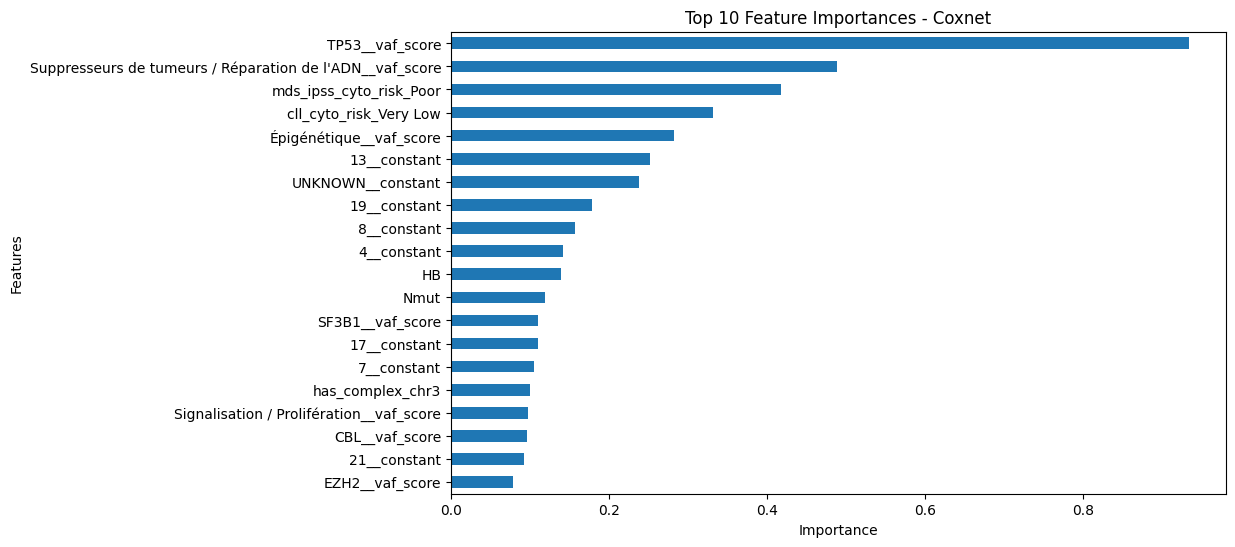

In [35]:
# Plot top 10 feature importances
import matplotlib.pyplot as plt

top_10 = cox_importance.head(20)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh')
plt.title('Top 10 Feature Importances - Coxnet')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # to have the most important at the top
plt.show()